In [12]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
trades = pd.read_csv('./trade_data/Магнит5P02.csv')

In [14]:
risk_free_yields = pd.read_csv('risk_free_yields.csv')

In [42]:
risk_free_yields

,Unnamed: 0,tradedate,tradetime,period_0.25,period_0.5,period_0.75,period_1.0,period_1.5,period_2.0,period_2.5,period_3.0,period_3.5,period_4.0,period_5.0,period_7.0,period_10.0,period_15.0,date
0,0,03.01.2025,18:39:58,18.70,18.62,18.52,18.41,18.17,17.92,17.66,17.41,17.18,16.96,16.57,15.96,15.38,14.86,2025-01-03
1,1,06.01.2025,18:39:58,19.10,18.96,18.82,18.66,18.34,18.03,17.72,17.43,17.16,16.91,16.48,15.81,15.18,14.63,2025-01-06
2,2,08.01.2025,18:39:58,19.43,19.26,19.07,18.87,18.48,18.11,17.75,17.42,17.11,16.84,16.37,15.68,15.07,14.60,2025-01-08
3,3,09.01.2025,18:39:58,18.77,18.68,18.57,18.46,18.22,17.97,17.72,17.48,17.27,17.07,16.72,16.19,15.64,15.08,2025-01-09
4,4,10.01.2025,18:39:56,19.06,18.93,18.79,18.64,18.34,18.05,17.77,17.52,17.28,17.08,16.73,16.21,15.70,15.20,2025-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,24.07.2025,18:49:57,15.15,14.50,14.12,13.91,13.76,13.77,13.81,13.87,13.92,13.97,14.04,14.12,14.13,14.07,2025-07-24
141,141,25.07.2025,18:49:58,15.22,14.58,14.22,14.01,13.85,13.82,13.84,13.87,13.90,13.93,13.97,14.01,14.02,13.98,2025-07-25
142,142,28.07.2025,18:49:59,14.88,14.33,14.03,13.87,13.76,13.77,13.80,13.84,13.88,13.91,13.97,14.04,14.08,14.07,2025-07-28
143,143,29.07.2025,18:49:58,14.94,14.25,13.85,13.62,13.47,13.48,13.54,13.62,13.69,13.76,13.86,14.00,14.09,14.10,2025-07-29


In [15]:
metadata = pd.read_csv('issuance_data.csv')

In [16]:
paper_data = metadata[ metadata["Название"] == "Магнит5P02"]

In [17]:
paper_data

,Unnamed: 0,Название,ISIN,Рейтинг,Качество Эмитента,Объем,Дата Выпуска,Дата Погашения / Оферты,Купон,Частота Выплат,Дюрация,numRating,toMaturity,dateStart,dateEnd,risk_free_yield_toMaturity,risk_free_yield_toDuration,effYield,premium
29,30,Магнит5P02,RU000A10AXH5,AA,4.2,46500,18.02.2025,11.09.2026,21.5,12,1.01,1,1.561644,2025-02-18,2026-09-11,18.32,18.82,23.750426,5.430426


In [10]:
trades["date"] = trades.apply(lambda row: datetime.strptime(str(row["<DATE>"]), "%d%m%y"), axis=1)

In [11]:
trades["ohlc4"] = ( trades["<CLOSE>"] + trades["<OPEN>"] + trades["<HIGH>"] + trades["<LOW>"] ) /4

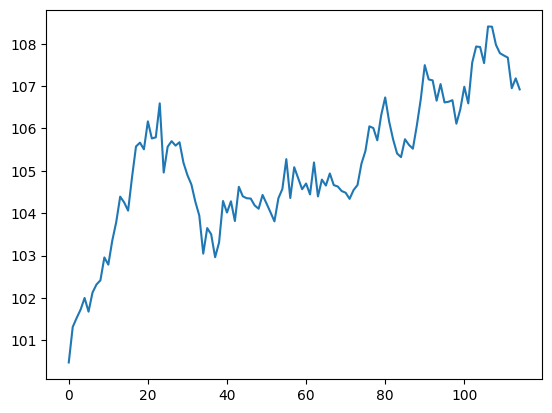

In [13]:
plt.plot(trades["ohlc4"])

In [33]:
trades["dateEnd"] = trades.apply(lambda row: datetime.strptime(paper_data["dateEnd"].values[0], "%Y-%m-%d"), axis=1)

In [38]:
trades["toMaturity"] = trades.apply(lambda row: (row["dateEnd"] - row["date"]).days / 365, axis=1)

In [39]:
trades.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,date,ohlc4,dateEnd,toMaturity
0,RU000A10AXH5,D,180225,0,100.00,101.00,100.00,100.90,22.908,2025-02-18,100.4750,2026-09-11,1.561644
1,RU000A10AXH5,D,190225,0,101.00,101.74,100.77,101.74,875.630,2025-02-19,101.3125,2026-09-11,1.558904
2,RU000A10AXH5,D,200225,0,101.50,101.70,101.21,101.70,120.295,2025-02-20,101.5275,2026-09-11,1.556164
3,RU000A10AXH5,D,210225,0,101.70,101.95,101.40,101.85,20.801,2025-02-21,101.7250,2026-09-11,1.553425
4,RU000A10AXH5,D,240225,0,101.85,102.29,101.85,102.00,10.623,2025-02-24,101.9975,2026-09-11,1.545205


In [40]:
def get_risk_free_yield(start_date, to_maturity):
    items = risk_free_yields['date'].to_numpy()
    closest_date = nearest_date(items, start_date)
    periods = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 7.0, 10.0, 15.0]
    closest_period = get_closest_period(to_maturity, periods)
    column_name = get_col_name(closest_period)
    row = risk_free_yields.loc[risk_free_yields['date'] == closest_date]
    return row[column_name].values[0]

def get_col_name(period):
    return 'period_' + str(period)

def get_closest_period(value, periods):
    result = min(periods, key=lambda x: abs(x - value))
    return result

def nearest_date(items, pivot):
    return min([i for i in items if i <= pivot], key=lambda x: abs(x - pivot))

In [44]:
risk_free_yields["date"] = risk_free_yields.apply(lambda row: datetime.strptime(row["date"], "%Y-%m-%d"), axis=1)

In [46]:
trades["risk_free_yield"] = trades.apply(lambda row: get_risk_free_yield(row["date"], row["toMaturity"]), axis=1)

In [48]:
trades.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,date,ohlc4,dateEnd,toMaturity,risk_free_yield
0,RU000A10AXH5,D,180225,0,100.00,101.00,100.00,100.90,22.908,2025-02-18,100.4750,2026-09-11,1.561644,18.32
1,RU000A10AXH5,D,190225,0,101.00,101.74,100.77,101.74,875.630,2025-02-19,101.3125,2026-09-11,1.558904,18.37
2,RU000A10AXH5,D,200225,0,101.50,101.70,101.21,101.70,120.295,2025-02-20,101.5275,2026-09-11,1.556164,18.27
3,RU000A10AXH5,D,210225,0,101.70,101.95,101.40,101.85,20.801,2025-02-21,101.7250,2026-09-11,1.553425,18.35
4,RU000A10AXH5,D,240225,0,101.85,102.29,101.85,102.00,10.623,2025-02-24,101.9975,2026-09-11,1.545205,18.40


In [58]:
def calculate_ytm(row, coupon):
    face_value = 100
    present_value = row["ohlc4"]
    avg = (face_value + present_value) / 2
    t = row["toMaturity"]
    ytm = (coupon + (face_value - present_value) / t) / avg
    return ytm * 100

In [59]:
trades["ytm"] = trades.apply(lambda row: calculate_ytm(row, paper_data["effYield"]), axis=1)

In [61]:
trades["premium"] = trades["ytm"] - trades["risk_free_yield"]

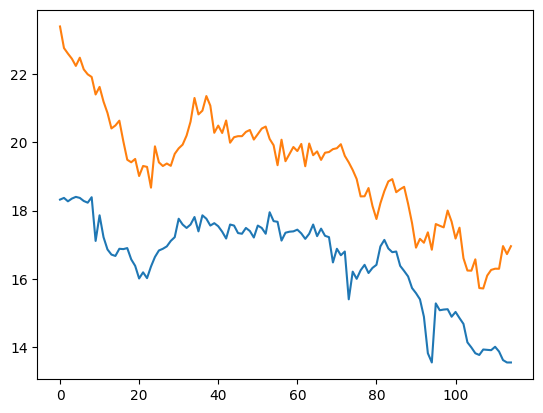

In [62]:
plt.plot(trades["risk_free_yield"])
plt.plot(trades["ytm"])

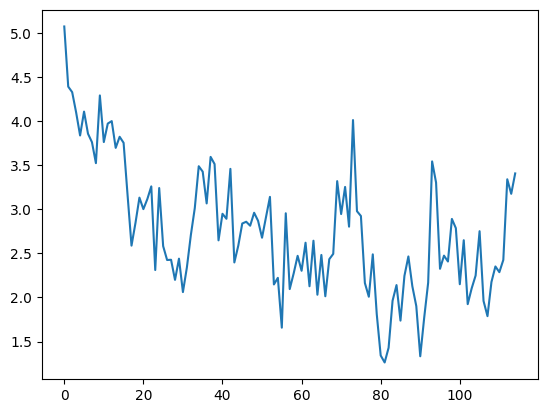

In [63]:
plt.plot(trades["premium"])